In [1]:
import os
import sys
import yaml
import itertools as itt
from typing import List, Dict, Tuple, Optional
from random import shuffle
from math import comb

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import infovar
from infovar import MI

sys.path.insert(0, os.path.join(".."))
sys.path.insert(1, os.path.join("..", "data", "discrete"))

from pdr_util import PDRGetter


# Getter

n_samples = 1_000_000
env = "horsehead"
obs_time = 0.75
seed = 0

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    seed
)


# Launch the procedure

line_names = getter.x_names
param_names = ["Avmax", "P", "radm"]

n_lines = [1, 2, 3]

emir_line_names = line_names[:-3]
fir_line_names = line_names[-3:]

In [2]:
# lines = [
#     "cn_n1_j1d5__n0_j0d5",
#     "co_v0_j3__v0_j2",
#     "cs_j5__j4",
#     "c2h_n3d0_j3d5_f4d0__n2d0_j2d5_f3d0",
# ]

lines = [
    # "hcop_j1__j0",
    # "cs_j2__j1",
    "c_18o_j1__j0",
    # "13c_o_j1__j0",
]

params = ["Avmax"]

restr = {"Avmax": (12, 40)}

In [3]:
mi = MI()

In [4]:
n_iter = 20
samples = np.logspace(2, 5, 25).round().astype(int)

mis = []
for n in tqdm(samples):

    _mis = []
    for it in range(n_iter):

        X, Y = getter.get(lines, params, restr, n)
        _mis.append(
            mi(X, Y)
        )

    mis.append(_mis)

mis_arr = np.array(mis)

100%|██████████| 25/25 [01:40<00:00,  4.02s/it]


In [5]:
mis_mean = np.mean(mis_arr, axis=1)
mis_std = np.std(mis_arr, axis=1)

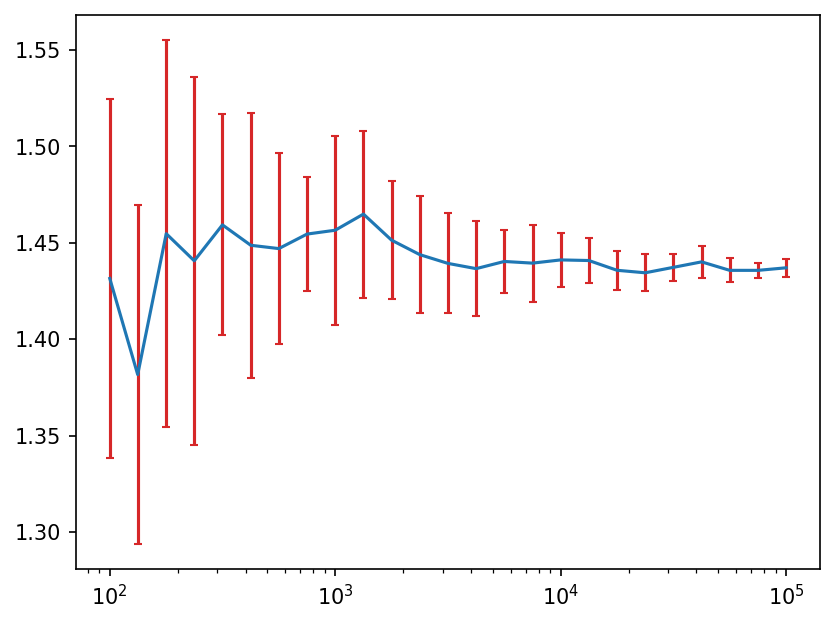

In [6]:
plt.figure(dpi=150)

plt.errorbar(samples, mis_mean, yerr=mis_std, ecolor="tab:red", capsize=2)
plt.xscale("log")

plt.show()

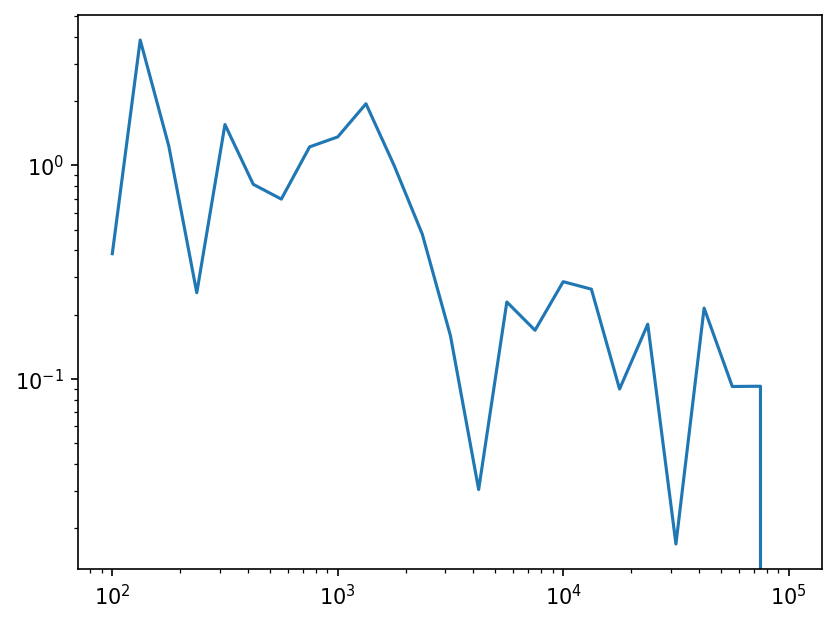

In [7]:
plt.figure(dpi=150)

plt.plot(samples, 100*(np.abs(mis_mean[-1]-mis_mean))/mis_mean[0])
plt.xscale("log")
plt.yscale("log")

plt.show()